In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [4]:
house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
X_train_full ,X_test , Y_train_full ,Y_test = train_test_split(house.data , house.target, random_state=42)

In [7]:
X_train, X_valid , Y_train ,Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu" , input_shape=[8]),
    keras.layers.Dense(50,activation = "relu"),
    keras.layers.Dense(1)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error',
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [39]:
new_model = model.fit(X_train,Y_train,  epochs=15, validation_data = (X_valid,Y_valid))

Epoch 1/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3981 - mae: 0.4515 - val_loss: 0.3779 - val_mae: 0.4341
Epoch 2/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3951 - mae: 0.4487 - val_loss: 0.3986 - val_mae: 0.4400
Epoch 3/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3924 - mae: 0.4478 - val_loss: 0.3744 - val_mae: 0.4303
Epoch 4/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3897 - mae: 0.4455 - val_loss: 0.3747 - val_mae: 0.4334
Epoch 5/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3875 - mae: 0.4440 - val_loss: 0.3685 - val_mae: 0.4298
Epoch 6/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4429 - val_loss: 0.3724 - val_mae: 0.4271
Epoch 7/15
363/363 [==============================] - 1s 2ms/step - loss: 0.3831 - mae: 0.4410 - val_loss: 0.3621 - val_mae: 0.4256
Epoch 8/15
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [29]:
model.evaluate(X_test,Y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3960 - mae: 0.4504


[0.39601442217826843, 0.4504103660583496]

(0.0, 1.0)

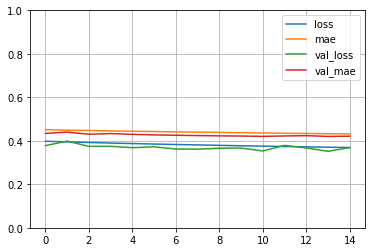

In [40]:
pd.DataFrame(new_model.history).plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [41]:
X_new = X_test[:3]

In [42]:
Y_predict = model.predict(X_new)
Y_predict

array([[0.6766074],
       [1.9434307],
       [3.768014 ]], dtype=float32)

In [43]:
Y_test[:3]

array([0.477  , 0.458  , 5.00001])

## for deleting model in keras
#####  del model
    
### for clear data in memory in ram
#####   keras.backend.clear_session()

In [44]:
del model

In [45]:
keras.backend.clear_session()

# Creating new Model on functional  API

In [47]:
input_ = keras.layers.Input(shape = [8])
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_)
hidden2 = keras.layers.Dense(50,activation = 'relu')(hidden1)
concate = keras.layers.concatenate([hidden2,input_])
output = keras.layers.Dense(1)(concate)
model = keras.models.Model(inputs = [input_] ,outputs = [output])

In [49]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           1550        dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 58)           0           dense_1[0][0]                    
                                                                 input_1[0][0]         

In [57]:
model.compile(loss='mean_squared_error',
              optimizer = keras.optimizers.SGD(lr = 1e-2),
             metrics = ['mae'])

In [58]:
model_history = model.fit(X_train,Y_train , epochs=30 , validation_data = (X_valid,Y_valid) )

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7903 - mae: 0.6318 - val_loss: 1.7324 - val_mae: 0.5227
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - mae: 0.5059 - val_loss: 6.8610 - val_mae: 0.5308
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6066 - mae: 0.5114 - val_loss: 20.1943 - val_mae: 0.5619
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5392 - mae: 0.4897 - val_loss: 59.7679 - val_mae: 0.6475
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4857 - mae: 0.4734 - val_loss: 86.4670 - val_mae: 0.7065
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1157 - mae: 0.5373 - val_loss: 0.5216 - val_mae: 0.4644
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6696 - mae: 0.6978 - val_loss: 253.6464 - val_mae: 0.9360
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - los

In [62]:
model_evaluation = model.evaluate(X_test,Y_test)

162/162 [==============================] - 0s 2ms/step - loss: nan - mae: nan


In [66]:
model_history.history

{'loss': [0.7903477549552917,
  0.5134186744689941,
  0.6065750122070312,
  0.5391756296157837,
  0.48574694991111755,
  1.1157158613204956,
  1.6696045398712158,
  0.5500035881996155,
  0.4799169600009918,
  0.7085298299789429,
  0.6747838854789734,
  10.470417976379395,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'mae': [0.6317861080169678,
  0.5058540105819702,
  0.5114414691925049,
  0.489668071269989,
  0.47335439920425415,
  0.5372623205184937,
  0.6978266835212708,
  0.5048562288284302,
  0.4672287702560425,
  0.5043027400970459,
  0.469384104013443,
  0.8808487057685852,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_loss': [1.7323575019836426,
  6.86104154586792,
  20.194297790527344,
  59.76786422729492,
  86.46704864501953,
  0.5215668678283691,
  253.6463623046875,
  290.5506286621094,
  1.7443033456802368,

(0.0, 1.0)

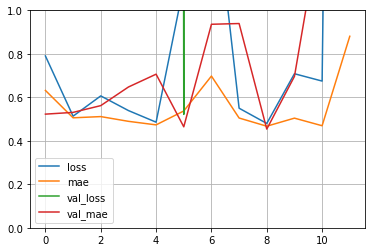

In [68]:
pd.DataFrame(model_history.history).plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)